# Importing Required Libararies

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Input data file

In [72]:
df=pd.read_csv('loan.csv')

S:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Checking structure of the data and columns and first five rows 

In [73]:
print("Structure of the loan data",df.shape)
print("\n Total Columns",df.columns)
print("\n First 5 rows of the data\n ",df.head())

Structure of the loan data (39717, 111)

 Total Columns Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

 First 5 rows of the data
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grad

# Data Cleaning 

In [74]:
# Lets check how many missing values are present in the dataset
print("Missing Values in the dataset",df.isnull().sum())
print("\n \n Blank columns in the dataset",df.isnull().all(axis=0).sum())


# Identifying the names of columns which are empty
List_Empty_Columns=df.columns[df.isna().all()].tolist()
print("Total Empty Columns",len(List_Empty_Columns))

#Lets drop that empty columns

df.drop(labels=List_Empty_Columns,axis=1,inplace=True)

#Check shape of the dataframe
print("Structure of dataframe after deletig empty columns",df.shape)

# Rechaeck if any column contains missing values
print("Checking if any column contain missing values",df.isnull().sum())

#Drop those columns who contains more than 50% missing values
columns_to_drop=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc']
df.drop(labels=columns_to_drop,axis=1,inplace=True)
df.shape

# Rechaeck if any column contains missing values
print("Checking if any column contain missing values",df.isnull().sum())

# Columns 'emp_title' ,title which not provide any additional information
columns_to_drop=['emp_title' ,'title']
df.drop(labels=columns_to_drop,axis=1,inplace=True)

#In data there are some columns contains only single unique value lets find out and drop that columns
column_unique = df.nunique()
print(column_unique)

Only_one_unique_value_columns = column_unique[column_unique.values == 1]
Only_one_unique_value_columns.index

df.drop(columns = list(Only_one_unique_value_columns.index), inplace=True)
df.shape

# these columns doesn't provide any information which can be used to predict 
columns_to_drop = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=columns_to_drop, inplace=True)
df.shape


Missing Values in the dataset id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

 
 Blank columns in the dataset 54
Total Empty Columns 54
Structure of dataframe after deletig empty columns (39717, 57)
Checking if any column contain missing values id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title           

(39717, 26)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0


In [76]:
#Fillna of emp_length with 0
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head(2)

#Fillna of pub_rec_bankruptcies with 0 i.e most occured value
df['pub_rec_bankruptcies'].fillna('0',inplace=True)

#Fillna of revol_util with 0 i.e most occured value
df['revol_util'].fillna('0',inplace=True)

#Remove unwanted character from emp_length
df['revol_util']= df['revol_util'].str.rstrip('%')
df['int_rate']=df['int_rate'].str.rstrip('%')


### Data Preparation

In [82]:
#Converting to Numeric
columns1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
df[columns1] = df[columns1].apply(pd.to_numeric)

In [83]:
# how many loans were fully paid & how many loans were charged off
df['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [89]:
df['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [88]:
df['verification_status'].value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [84]:
df['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [85]:
df['sub_grade'].value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [87]:
df['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [90]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

In [91]:
# changing the loan_status to a numeric variable, assign 1-> defaulted loans and 0 -> paid off ones
df['loan_status_num'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

## Univariate Analysis

S:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

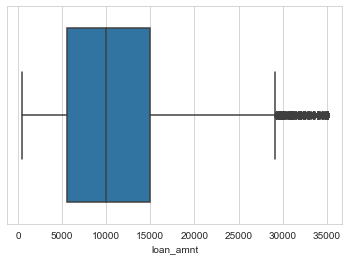

In [96]:
sns.boxplot(df.loan_amnt)

S:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


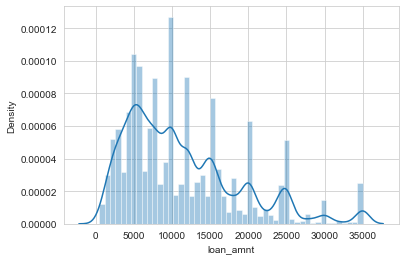

In [103]:
sns.distplot(df.loan_amnt)

plt.show()

In [99]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'year', 'month',
       'loan_status_num'],
      dtype='object')

S:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


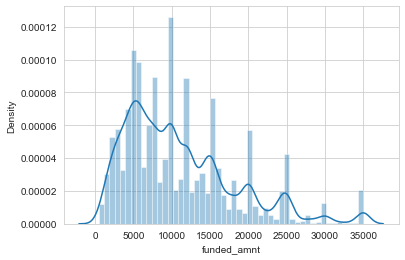

In [100]:
sns.distplot(df.funded_amnt)
plt.show()

S:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


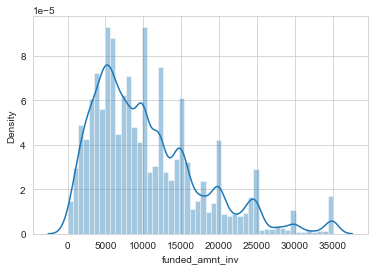

In [101]:
sns.distplot(df.funded_amnt_inv)
plt.show()

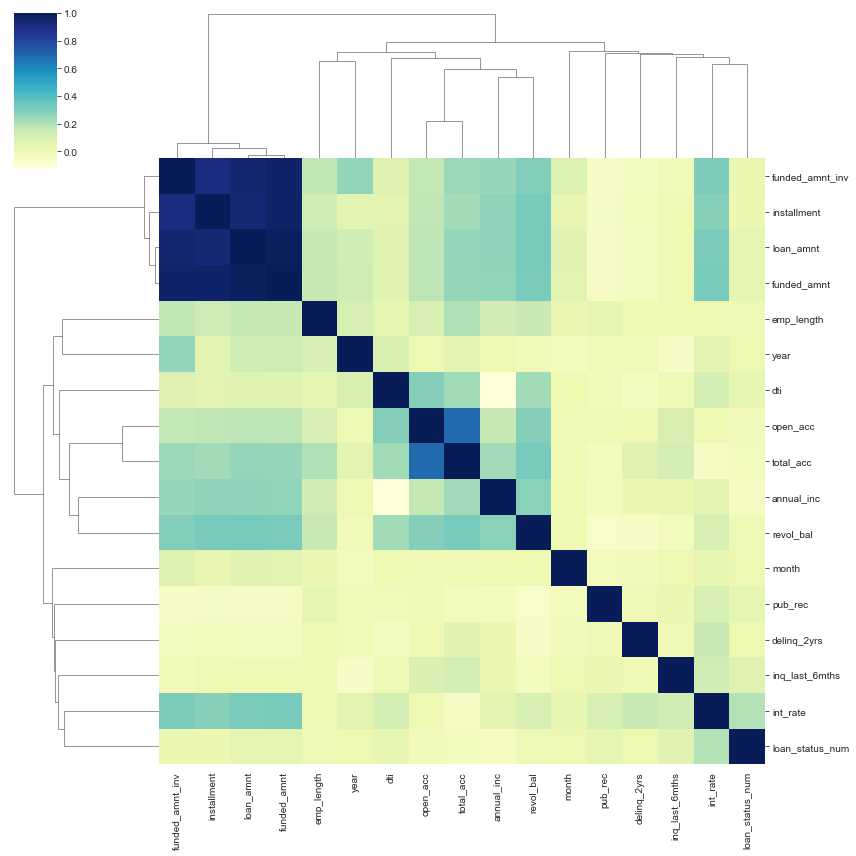

In [104]:
sns.set_style("whitegrid")
sns.clustermap(data=df.corr(), cmap='YlGnBu', figsize=(12,12))
plt.show()

In [105]:
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']

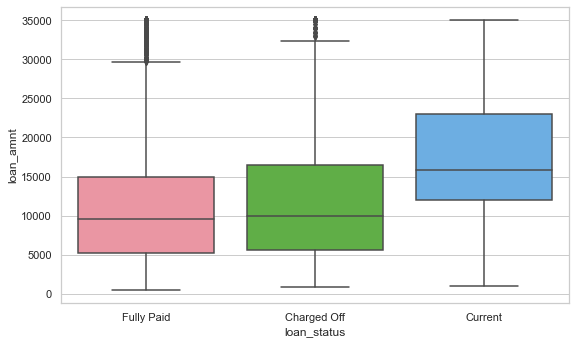

In [107]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

<AxesSubplot:xlabel='count', ylabel='purpose'>

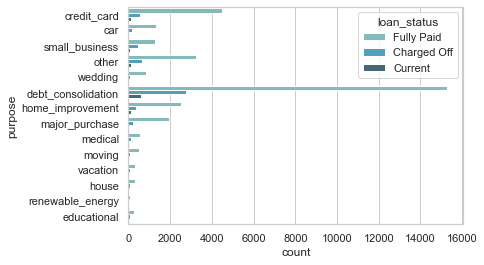

In [109]:
sns.countplot(y="purpose",data=df,hue='loan_status',palette='GnBu_d')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

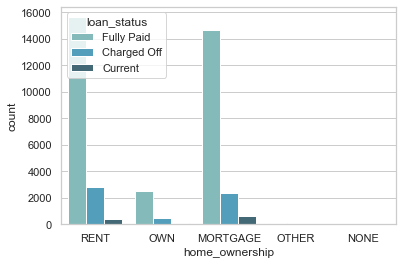

In [110]:
sns.countplot(x="home_ownership",data=df,hue='loan_status',palette='GnBu_d')

<AxesSubplot:xlabel='term', ylabel='count'>

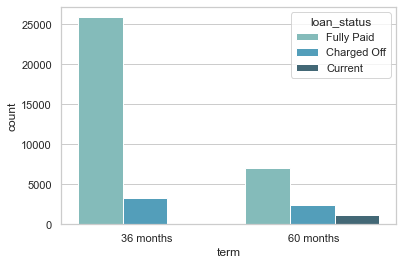

In [111]:
sns.countplot(x="term",data=df,hue='loan_status',palette='GnBu_d')

## Bivariate Analysis

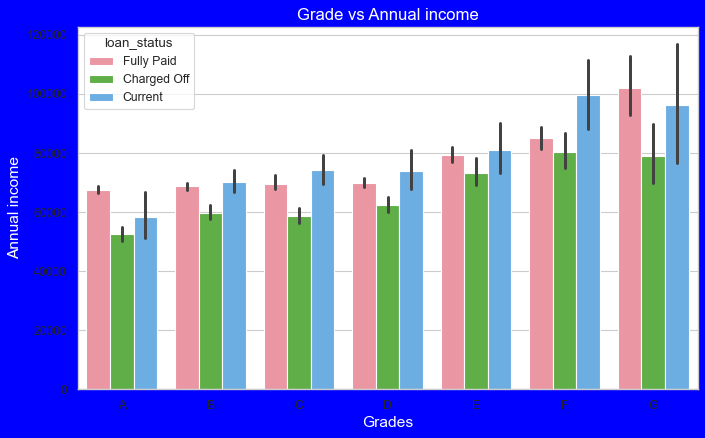

In [112]:
plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=df, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

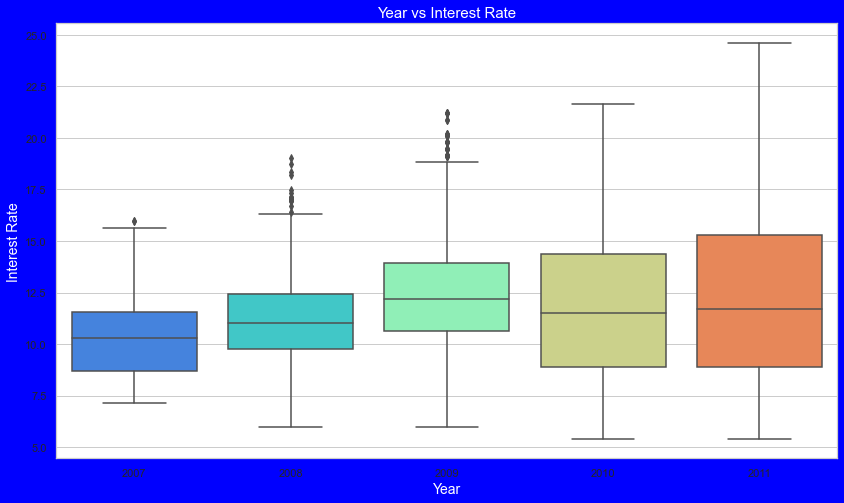

In [113]:
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()
